In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
lr = LogisticRegression(random_state=0)
std = StandardScaler()

pipe = Pipeline([('std', std),
                 ('lr', lr)])
                
pipe = pipe.fit(train.loc[:, 'pixel0':], train.loc[:, 'label'])

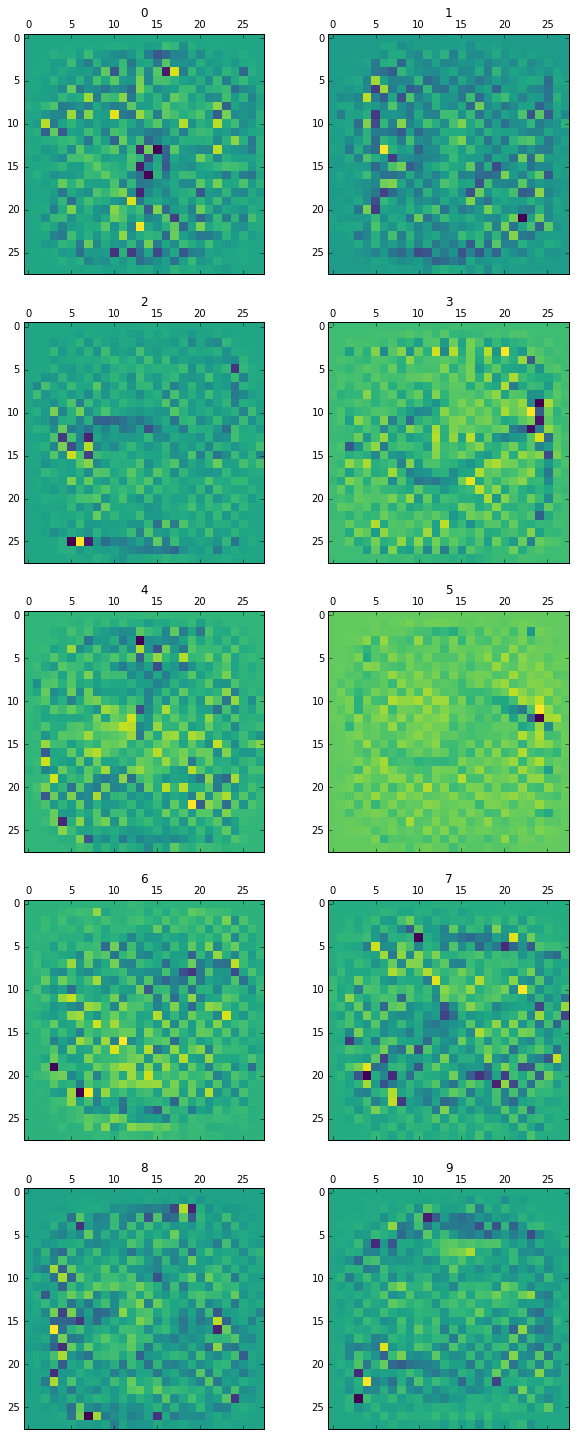

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(10, 25))

for ax, coefs, i in zip(axes.ravel(), pipe.steps[1][1].coef_, range(0, 10)):
    
    importance = coefs.reshape(28, 28)*2
    ax.matshow(importance, cmap=plt.cm.viridis)
    ax.set_title("{}".format(i))

In [42]:
prediction = pipe.predict(test.loc[:, 'pixel0':])

In [49]:
submission = pd.DataFrame({'Label': prediction, 'ImageId': np.arange(1, test.shape[0] + 1, 1)})

In [50]:
submission.to_csv('../submission/LogisticRegressionSimples.csv', index=False)